<a href="https://colab.research.google.com/github/mani6496/Amazon-Customer-Review/blob/main/randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
labels=["Number of times perganant","Plasms glucose","Diatolic Blood Pressure","Triceps skin fold thickness","2-Hours serum Insulin","Body Mass Index","Deibetes pedigree function","Age(years)","Target"]
diabetes=pd.read_csv("pima-indians-diabetes.csv",names=labels)

In [ ]:
diabetes.head()

,Number of times perganant,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index,Deibetes pedigree function,Age(years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.dtypes

Number of times perganant        int64
Plasms glucose                   int64
Diatolic Blood Pressure          int64
Triceps skin fold thickness      int64
2-Hours serum Insulin            int64
Body Mass Index                float64
Deibetes pedigree function     float64
Age(years)                       int64
Target                           int64
dtype: object

In [ ]:
diabetes['Target']=diabetes['Target'].astype('category')

In [ ]:
diabetes.dtypes

Number of times perganant         int64
Plasms glucose                    int64
Diatolic Blood Pressure           int64
Triceps skin fold thickness       int64
2-Hours serum Insulin             int64
Body Mass Index                 float64
Deibetes pedigree function      float64
Age(years)                        int64
Target                         category
dtype: object

In [ ]:
diabetes.describe()

,Number of times perganant,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index,Deibetes pedigree function,Age(years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
diabetes['Target'].value_counts()

0    500
1    268
Name: Target, dtype: int64

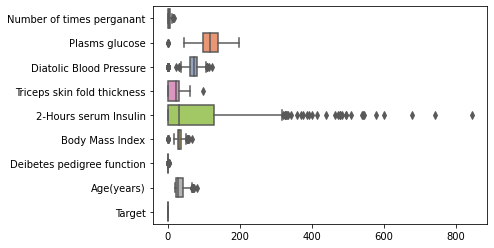

In [ ]:
fig,axes=plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

In [ ]:
q75,q25=np.percentile(diabetes["2-Hours serum Insulin"],[75,25])

In [ ]:
q25

0.0

In [ ]:
q75

127.25

In [ ]:
iqr = q75-q25

In [ ]:
whisker=q75 + (1.5*iqr)

In [ ]:
whisker

318.125

In [ ]:
diabetes["2-Hours serum Insulin"]=diabetes["2-Hours serum Insulin"].clip(upper=whisker)

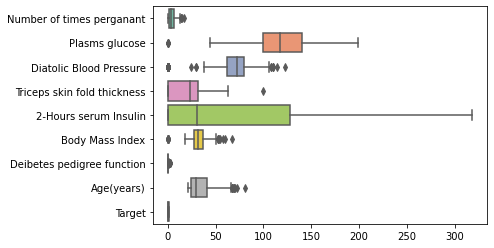

In [ ]:
fig,axes=plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

In [ ]:
# check missing value
diabetes.head()

,Number of times perganant,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index,Deibetes pedigree function,Age(years),Target
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
#mnar-missing not as random
#mcar-missing completely at random
print((diabetes.iloc[:,[1,2,3,4,5]]==0).sum())

Plasms glucose                   5
Diatolic Blood Pressure         35
Triceps skin fold thickness    227
2-Hours serum Insulin          374
Body Mass Index                 11
dtype: int64


In [ ]:
diabetes.iloc[:,[1,2,3,4,5]]=diabetes.iloc[:,[1,2,3,4,5]].replace(0,np.NaN)

In [ ]:
diabetes.head()

,Number of times perganant,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index,Deibetes pedigree function,Age(years),Target
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
diabetes.isnull().sum()

Number of times perganant        0
Plasms glucose                   5
Diatolic Blood Pressure         35
Triceps skin fold thickness    227
2-Hours serum Insulin          374
Body Mass Index                 11
Deibetes pedigree function       0
Age(years)                       0
Target                           0
dtype: int64

In [ ]:
#Drop these values

print("Size of the data before dropping",diabetes.shape)

Size of the data before dropping (768, 9)


In [ ]:
nan_dropped=diabetes.dropna()
print(diabetes.isnull().sum())

Number of times perganant        0
Plasms glucose                   5
Diatolic Blood Pressure         35
Triceps skin fold thickness    227
2-Hours serum Insulin          374
Body Mass Index                 11
Deibetes pedigree function       0
Age(years)                       0
Target                           0
dtype: int64


In [ ]:
print(nan_dropped.shape)

(392, 9)


In [ ]:
#Drop the row/column having null values more than certain percentage
diabetes.isnull().mean()

Number of times perganant      0.000000
Plasms glucose                 0.006510
Diatolic Blood Pressure        0.045573
Triceps skin fold thickness    0.295573
2-Hours serum Insulin          0.486979
Body Mass Index                0.014323
Deibetes pedigree function     0.000000
Age(years)                     0.000000
Target                         0.000000
dtype: float64

In [ ]:
col_dropped=diabetes.loc[:,diabetes.isnull().mean()< .4]
row_dropped=diabetes.loc[diabetes.isnull().mean(axis=1) < .4,:]

In [ ]:
print(col_dropped.shape,row_dropped.shape)

(768, 8) (761, 9)


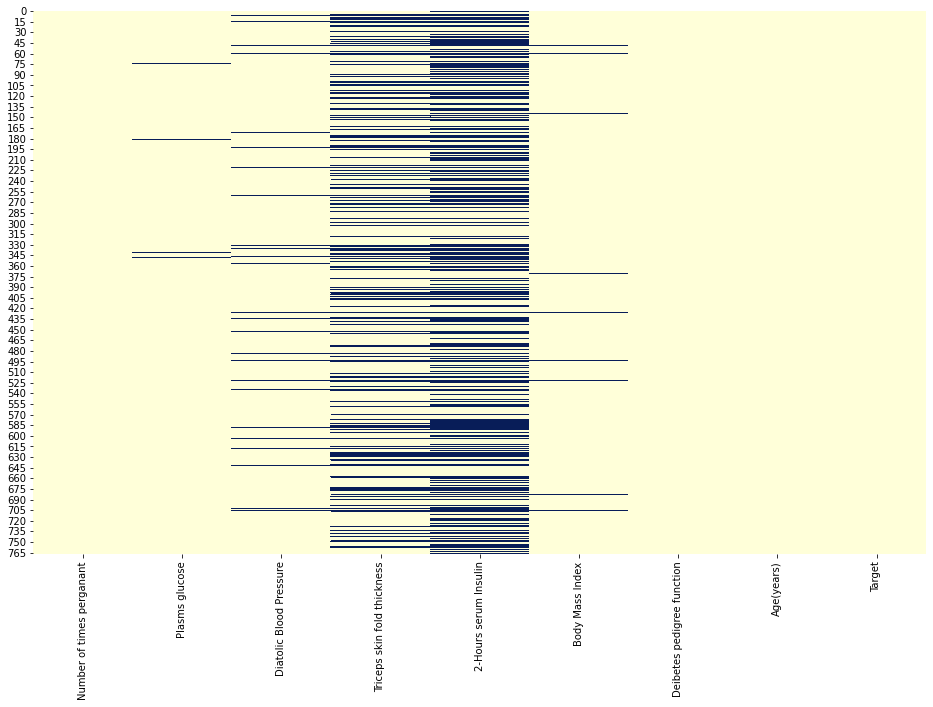

In [ ]:
#inputing
diabetes=pd.read_csv('pima-indians-diabetes.csv',names=labels)
diabetes.iloc[:,[1,2,3,4,5]]=diabetes.iloc[:,[1,2,3,4,5]].replace(0,np.NaN)
plt.figure(figsize=(16,10))
sns.heatmap(diabetes.isnull(),cbar=False,cmap="YlGnBu")

In [ ]:
dataset=diabetes.iloc[:,[1,2,3,4,5]]

In [ ]:
# fillna()
dataset.fillna(dataset.mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
dataset.isnull().sum()

Plasms glucose                 0
Diatolic Blood Pressure        0
Triceps skin fold thickness    0
2-Hours serum Insulin          0
Body Mass Index                0
dtype: int64

In [ ]:
dataset.head()

,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index
0,148.0,72.0,35.00000,155.548223,33.6
1,85.0,66.0,29.00000,155.548223,26.6
2,183.0,64.0,29.15342,155.548223,23.3
3,89.0,66.0,23.00000,94.000000,28.1
4,137.0,40.0,35.00000,168.000000,43.1


In [ ]:
from sklearn.impute import SimpleImputer
diabetes=pd.read_csv('pima-indians-diabetes.csv',names=labels)
diabetes.iloc[:,[1,2,3,4,5]]=diabetes.iloc[:,[1,2,3,4,5]].replace(0,np.NaN)
dataset=diabetes.iloc[:,[1,2,3,4,5]]

In [ ]:
dataset.head()

,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [ ]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
print(imputer.fit_transform(dataset))

[[148.          72.          35.         155.54822335  33.6       ]
 [ 85.          66.          29.         155.54822335  26.6       ]
 [183.          64.          29.15341959 155.54822335  23.3       ]
 ...
 [121.          72.          23.         112.          26.2       ]
 [126.          60.          29.15341959 155.54822335  30.1       ]
 [ 93.          70.          31.         155.54822335  30.4       ]]


In [ ]:
from sklearn.impute import KNNImputer
diabetes=pd.read_csv('pima-indians-diabetes.csv',names=labels)
diabetes.iloc[:,[1,2,3,4,5]]=diabetes.iloc[:,[1,2,3,4,5]].replace(0,np.NaN)
dataset=diabetes.iloc[:,[1,2,3,4,5]]

In [ ]:
imputer=KNNImputer(n_neighbors=3,weights="uniform")
print(imputer.fit_transform(dataset))

[[148.          72.          35.         241.66666667  33.6       ]
 [ 85.          66.          29.          90.33333333  26.6       ]
 [183.          64.          30.66666667 555.33333333  23.3       ]
 ...
 [121.          72.          23.         112.          26.2       ]
 [126.          60.          18.66666667 215.33333333  30.1       ]
 [ 93.          70.          31.          65.33333333  30.4       ]]


In [ ]:
#Range Scaling
vector=np.random.chisquare(1,500)

In [ ]:
print(vector)

[1.85089749e+00 4.40043343e-01 9.71637035e-01 4.44445652e-01
 4.67443367e+00 1.52904937e+00 3.74435825e-01 3.42536069e-03
 2.93021187e+00 7.23606701e-01 4.16998303e+00 5.44409757e-01
 4.01402758e-02 1.40522178e+00 6.24705161e-03 7.30973857e-02
 9.57454363e-01 2.17989554e-01 1.91603328e-02 5.57629382e+00
 2.82605153e-01 2.51237704e-01 2.71709096e-01 2.37696239e+00
 7.55275161e-01 6.20034495e-03 6.10990701e-01 4.13414497e-01
 1.33053192e+00 7.09245362e-01 1.46061450e+00 3.47050869e-01
 1.21778895e+00 6.06686897e-01 1.28666310e-03 3.52499210e-02
 3.05245535e-01 2.45544636e+00 4.56722655e-01 2.75054350e-03
 9.30232180e-03 3.80525719e-03 9.41379654e-01 8.69839262e-01
 2.38511903e-01 1.51535910e+00 6.89670855e-01 1.78577528e-01
 4.16300672e+00 1.20976741e+00 2.10523570e-02 2.95356383e+00
 7.40749464e-02 2.15372791e+00 2.22432313e+00 5.73554759e+00
 1.12498329e-01 3.88305018e-01 2.25458813e-02 1.05736890e+00
 1.78381849e-01 2.90425114e-01 4.80595543e-01 1.00488881e+00
 4.91460503e-01 1.586218

In [ ]:
print("Mean",np.mean(vector))
print("SD",np.std(vector))
print("Range",max(vector)-min(vector))

Mean 1.037715697183231
SD 1.5026976996620116
Range 10.37853145337298


In [ ]:
from sklearn.preprocessing import MinMaxScaler
range_scaler=MinMaxScaler()
range_scaler.fit(vector.reshape(-1,1))
range_scaler_vector=range_scaler.transform(vector.reshape(-1,1))
print("Mean",np.mean(range_scaler_vector))
print("SD",np.std(range_scaler_vector))
print("Range",max(range_scaler_vector)-min(range_scaler_vector))

Mean 0.09998670629639975
SD 0.14478904904928924
Range [1.]


In [ ]:
range_scaler_vector

array([[1.78339004e-01],
       [4.23993340e-02],
       [9.36198457e-02],
       [4.28235086e-02],
       [4.50394468e-01],
       [1.47328054e-01],
       [3.60778696e-02],
       [3.29992710e-04],
       [2.82333909e-01],
       [6.97214422e-02],
       [4.01789263e-01],
       [5.24553246e-02],
       [3.86757558e-03],
       [1.35396927e-01],
       [6.01870377e-04],
       [7.04308360e-03],
       [9.22533064e-02],
       [2.10038419e-02],
       [1.84610048e-03],
       [5.37291169e-01],
       [2.72297322e-02],
       [2.42073923e-02],
       [2.61798672e-02],
       [2.29026802e-01],
       [7.27727852e-02],
       [5.97370063e-04],
       [5.88705814e-02],
       [3.98335716e-02],
       [1.28200353e-01],
       [6.83376877e-02],
       [1.40734167e-01],
       [3.34392539e-02],
       [1.17337258e-01],
       [5.84558980e-02],
       [1.23923326e-04],
       [3.39637647e-03],
       [2.94111951e-02],
       [2.36588948e-01],
       [4.40064316e-02],
       [2.64972221e-04],


In [ ]:
from sklearn.preprocessing import StandardScaler
range_scaler=StandardScaler()
range_scaler.fit(vector.reshape(-1,1))
range_scaler_vector=range_scaler.transform(vector.reshape(-1,1))
print("Mean",np.mean(range_scaler_vector))
print("SD",np.std(range_scaler_vector))
print("Range",max(range_scaler_vector)-min(range_scaler_vector))

Mean 2.1316282072803006e-17
SD 1.0
Range [6.90659968]


In [ ]:
# Binning
diabetes.head()

,Number of times perganant,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index,Deibetes pedigree function,Age(years),Target
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
bins = [0,25,30,35,40,100]
group_names=['malnutrition','Under-weight','Healthy','Over-weight','Obese']
diabetes['BMI class']=pd.cut(diabetes['Body Mass Index'],bins,labels=group_names)
diabetes.head()

,Number of times perganant,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index,Deibetes pedigree function,Age(years),Target,BMI class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Healthy
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Under-weight
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,malnutrition
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Under-weight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese


In [ ]:
# Dummification/One Hot encoding
dummified_data=pd.concat([diabetes.iloc[:,:-1],pd.get_dummies(diabetes['BMI class'])],axis=1)

In [ ]:
dummified_data.head()

,Number of times perganant,Plasms glucose,Diatolic Blood Pressure,Triceps skin fold thickness,2-Hours serum Insulin,Body Mass Index,Deibetes pedigree function,Age(years),Target,malnutrition,Under-weight,Healthy,Over-weight,Obese
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,0,0,1,0,0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,0,1,0,0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,1


In [ ]:
diabetes.dtypes

Number of times perganant         int64
Plasms glucose                  float64
Diatolic Blood Pressure         float64
Triceps skin fold thickness     float64
2-Hours serum Insulin           float64
Body Mass Index                 float64
Deibetes pedigree function      float64
Age(years)                        int64
Target                            int64
BMI class                      category
dtype: object

In [ ]:
# Label Encoding
diabetes['BMI class']=diabetes['BMI class'].astype('category')
diabetes['BMI class code']=diabetes['BMI class'].cat.codes

In [ ]:
diabetes[["BMI class code",'BMI class']]

,BMI class code,BMI class
0,2,Healthy
1,1,Under-weight
2,0,malnutrition
3,1,Under-weight
4,4,Obese
...,...,...
763,2,Healthy
764,3,Over-weight
765,1,Under-weight
766,2,Healthy


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
diabetes["BMI class label"]=labelencoder.fit_transform(diabetes["BMI class"].astype(str))

In [ ]:
diabetes[["BMI class label","BMI class"]]

,BMI class label,BMI class
0,0,Healthy
1,3,Under-weight
2,4,malnutrition
3,3,Under-weight
4,1,Obese
...,...,...
763,0,Healthy
764,2,Over-weight
765,3,Under-weight
766,0,Healthy
